## Outline
- Dummy variables
- F-test
- Adjusted $R^2$
- Interaction terms
- Stepwise regression

**Question 1**

A company that makes carseats would like to construct a model to predict sales. 

The data file https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv contains 400 observations on the following 11 variables.

```
Sales:         Unit sales (in thousands) at each location
CompPrice:     Price charged by competitor at each location
Income:        Community income level (in thousands of dollars)
Advertising:   Local advertising budget for company at each location (in thousands of dollars)
Population:    Population size in region (in thousands)
Price:         Price company charges for car seats at each site
ShelveLoc:     A factor with levels Bad, Good and Medium indicating the quality of the shelving location
for the car seats at each site
Age:           Average age of the local population
Education:     Education level at each location
Urban:         A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US:            A factor with levels No and Yes to indicate whether the store is in the US or not
```

<br>

1. Load in and visualize the data with the appropriate plots. The following command makes a scatter matrix plot with a lot of data easier to read:
   ```python
   pd.scatter_matrix(carseat_data, figsize=(17, 10), edgecolor='none', alpha=0.5);
   ```
   
   Use additional plots as you see appropriate. 
   
   Comment on the trends you have observed in the data.
   
   <br>

2. We can visualize categorical variables with bar plots. Use the command `carseat_data.plot(kind='bar')` to plot the categorical variables. The command is configurable by additional arguments, read the docs [here](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#bar-plots). Below is an example you can reference:

   ```python
   carseat_data['Urban'].value_counts().plot(kind='bar', ax=axs[0][0], title='Urban')
   ```

   <br>

3. To fit a multiple regression model on a categorical variable, the categorical variable must be binarized into columns which consists of either `0` or `1`.

   Use the command `binarized = pd.get_dummies(carseat_data)` to binarized all the categorical variables in the dataframe.
   
   To fit a multiple regression model, one of the dummy variables created from each categorical variable has to be removed. 
   
   For each categorical variable, pick one dummy column to remove. Use the command `binarized.drop(column_name_list, axis=1)`
   
   <br>

4. Build a multiple regression model to predict `sales` with all the variables provided. Remember to add an intercept column to the dataframe before fitting the regression model. Print the summary of the fitted model.

   <br>

5. Interpret the result given by the F-statistic and its p-value. 

   <br>
   
6. Interpret the coefficients of the model.
  
   <br>
   
7. Perform a backward stepwise regression on the model by removing statistically insignificant coefficients one at a time (starting from the most insignificant variable). Re-run the model after each variable elimination; iterate until all variables are statistically significant to obtain the final model. 

   Is it meaningful to compare the $R^2$ of the original model with the final model. Examine the adjusted $R^2$ and explain why it is more appropriate to use it here. 

   How is the fit of the final model?

In [10]:
%pylab inline

import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import yaml

from sqlalchemy import create_engine

pg_creds = yaml.load(open('../../pg_creds.yaml'))['student']

engine = create_engine('postgresql://{user}:{password}@{host}:{port}/{dbname}'.format(**pg_creds))

Populating the interactive namespace from numpy and matplotlib


In [2]:
car_seats = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/carseats.csv')
car_seats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138.0,73.0,11.0,276.0,120.0,Bad,42.0,17.0,Yes,Yes
1,11.22,111.0,48.0,16.0,260.0,83.0,Good,65.0,10.0,Yes,Yes
2,10.06,113.0,35.0,10.0,269.0,80.0,Medium,59.0,12.0,Yes,Yes
3,7.40,117.0,100.0,4.0,466.0,97.0,Medium,55.0,14.0,Yes,Yes
4,4.15,141.0,64.0,3.0,340.0,128.0,Bad,38.0,13.0,Yes,No


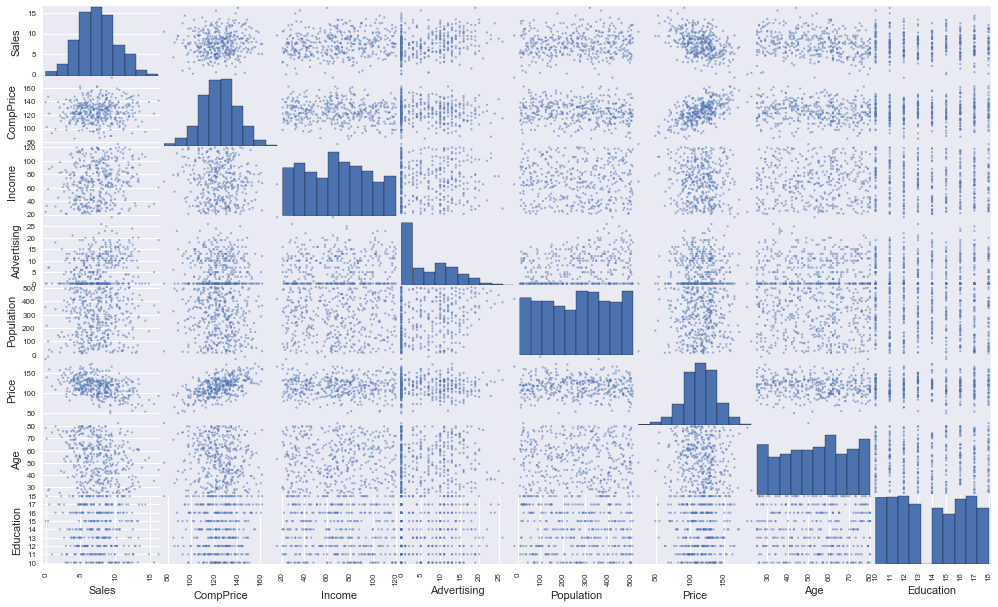

In [3]:
pd.scatter_matrix(car_seats, figsize=(17, 10), edgecolor='none', alpha=0.5);

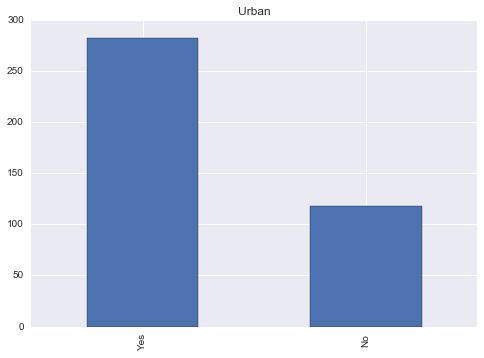

In [7]:
car_seats['Urban'].value_counts().plot(kind='bar', title='Urban')

In [4]:
binarized = pd.get_dummies(car_seats)

**Question 2**

The  `toothgrowth` table consists of four columns:
```
subj_id: Guinea pig identifier (PK)
len: Length of the tooth
supp: VC (Vitamin C) or OJ (Orange Juice)
dose: Dosage of OJ or VC
```

<br>

1. Encode the `supp` column where `VC` (vitamin C) is expressed by 0 and `OJ` (orange juice) is expressed by 1.

   <br>

2. Build a model using `supp` and `dose` to predict `len`. Comment on the fit and coefficients of the model.
   
   <br>

3. Include the interaction term between `dose` and `supp` and re-run the model. Does the new model fit the data better?

   <br>
   
4. Based on the coefficients given by the model, plot the `dose` (x) against `len` (y) for each of the two categories of `supp`. 

   Comment on the interaction effect between `supp` and `dose` on `len`.

In [12]:
toothgrowth = pd.read_sql("SELECT * FROM toothgrowth", engine)
toothgrowth.head()

,subj_id,len,supp,dose
0,0,4.2,VC,0.5
1,1,11.5,VC,0.5
2,2,7.3,VC,0.5
3,3,5.8,VC,0.5
4,4,6.4,VC,0.5


### 1

In [18]:
toothgrowth['supp'] = toothgrowth['supp'].apply(lambda x: 0 if x == 'VC' else 1)

In [21]:
toothgrowth.head()

,subj_id,len,supp,dose
0,0,4.2,0,0.5
1,1,11.5,0,0.5
2,2,7.3,0,0.5
3,3,5.8,0,0.5
4,4,6.4,0,0.5
